In [2]:
import seaborn as sns
planets = sns.load_dataset("planets")
df=planets.copy()

In [4]:
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [5]:
df.shape

(1035, 6)

In [6]:
df.columns

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

In [8]:
df.describe().T #describe fonksiyonu eksik gözlemleri gözardı eder,
                #kategorik değişkenleri dışarıda bırakır

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [9]:
#hiç eksik gözlem (değer)  var mı?
df.isnull().values.any()

True

In [10]:
#hangi değişkende kaçar tane eksik var?
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [13]:
#orbital_period kısmındaki eksik değerlerin yerine 0 yaz
df["orbital_period"].fillna(0,inplace=True) 
df.isnull().sum()

method              0
number              0
orbital_period      0
mass              522
distance          227
year                0
dtype: int64

In [15]:
#mass kısmındaki eksik değerlerin yerine ortalamayı yaz
df["mass"].fillna(df.mass.mean(),inplace=True) 
df.isnull().sum()

method              0
number              0
orbital_period      0
mass                0
distance          227
year                0
dtype: int64

*Sadece Kategorik Değişkenler ve Özetleri*


In [19]:
kat_df= df.select_dtypes(include=["object"])
kat_df.head()

,method
0,Radial Velocity
1,Radial Velocity
2,Radial Velocity
3,Radial Velocity
4,Radial Velocity


Kategorik Değişkenin Sınıflarına ve Sınıf Sayısına Erişmek 

In [20]:
kat_df.method.unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

In [21]:
kat_df["method"].value_counts().count()

10

Kategorik Değişkenin Sınıflarının Frekanslarına Erişmek

In [22]:
kat_df["method"].value_counts()

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

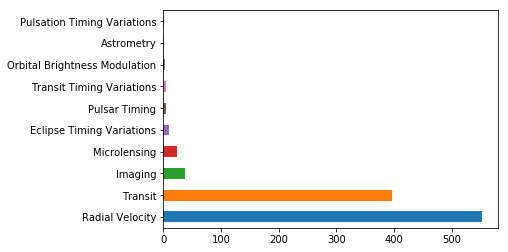

In [4]:
df["method"].value_counts().plot.barh()  #barh == bana sütün grafiği ver

In [37]:
df_num = df.select_dtypes(include = ["float64","int64"])

In [38]:
df_num.head()

,number,orbital_period,mass,distance,year
0,1,269.300,7.10,77.40,2006
1,1,874.774,2.21,56.95,2008
2,1,763.000,2.60,19.84,2011
3,1,326.030,19.40,110.62,2007
4,1,516.220,10.50,119.47,2009


In [40]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.0000,1.000000,1.000000,2.000000,7.0
orbital_period,1035.0,1919.704595,25471.198309,0.0000,4.461268,31.884000,487.100000,730000.0
mass,1035.0,2.638161,2.687081,0.0036,1.285000,2.638161,2.638161,25.0
distance,808.0,264.069282,733.116493,1.3500,32.560000,55.250000,178.500000,8500.0
year,1035.0,2009.070531,3.972567,1989.0000,2007.000000,2010.000000,2012.000000,2014.0


In [41]:
df_num["distance"].describe()

count     808.000000
mean      264.069282
std       733.116493
min         1.350000
25%        32.560000
50%        55.250000
75%       178.500000
max      8500.000000
Name: distance, dtype: float64

In [43]:
print("Ortalama: "+ str(df_num["distance"].mean()))
print("Dolu Gözlem Sayısı: "+ str(df_num["distance"].count()))
print("Maksimum Değer: "+ str(df_num["distance"].max()))
print("Minimum Değer: "+ str(df_num["distance"].min()))
print("Medyan: "+ str(df_num["distance"].median()))
print("Standart Sapma: "+ str(df_num["distance"].std()))

Ortalama: 264.06928217821786
Dolu Gözlem Sayısı: 808
Maksimum Değer: 8500.0
Minimum Değer: 1.35
Medyan: 55.25
Standart Sapma: 733.1164929404422


## Dağılım Grafikleri


Barplot         (Sütun Grafiği, Kategorik Değişkenleri Görselleştirmek İçin Kullanılır)

In [2]:
import seaborn as sns
diamonds = sns.load_dataset("diamonds")
df= diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [47]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [48]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [49]:
df["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [50]:
df["color"].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [16]:
#ordinal tanımlama
from pandas.api.types import CategoricalDtype

In [17]:
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: object

In [18]:
df.cut= df.cut.astype(CategoricalDtype(ordered=True))

In [19]:
df.dtypes

carat       float64
cut        category
color        object
clarity      object
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [20]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): [Fair < Good < Ideal < Premium < Very Good]

In [21]:
cut_kategoriler=["Fair","Good","Very Good","Premium","Ideal"]

In [22]:
df.cut= df.cut.astype(CategoricalDtype(ordered=True, categories=cut_kategoriler))

In [23]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): [Fair < Good < Very Good < Premium < Ideal]

In [24]:
#Barplot

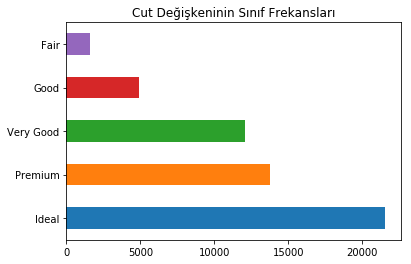

In [7]:
df["cut"].value_counts().plot.barh().set_title("Cut Değişkeninin Sınıf Frekansları");

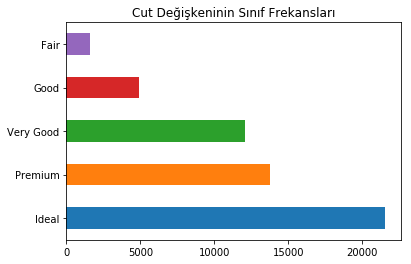

In [8]:
(df["cut"]
 .value_counts()
 .plot
 .barh()
 .set_title("Cut Değişkeninin Sınıf Frekansları"));

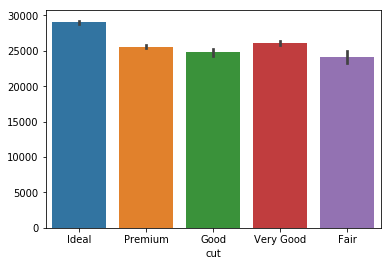

In [14]:
sns.barplot(x = "cut", y = df.cut.index, data = df);

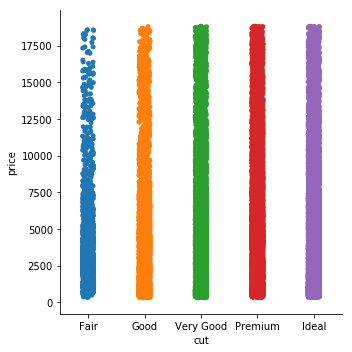

In [25]:
sns.catplot(x = "cut", y = "price",data =df)

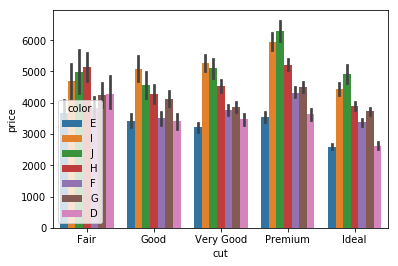

In [27]:
sns.barplot(x="cut",y="price",hue="color",data=df); #"hue" boyut ekleme anlamındadır
#siyah çubuklar standart sapmayı temsil eder

In [29]:
df.groupby(["cut","color"])["price"].mean() #grafiğe bakarak sonuçları doğruladık

cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Very Good  D        3470.467284
           E        3214.652083
           F        3778.820240
           G        3872.753806
           H        4535.390351
           I        5255.879568
           J        5103.513274
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Ideal      D        2629.094566
           E        2597.550090
           F        337

#Histogram ve Yoğunluk

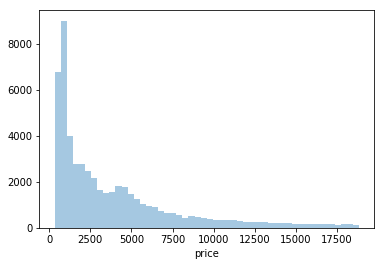

In [38]:
sns.distplot(df.price, kde=False); #"kde" yoğunluk

In [36]:
?sns.distplot

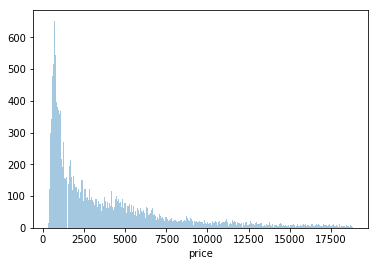

In [4]:
sns.distplot(df.price, bins=1000,kde=False);

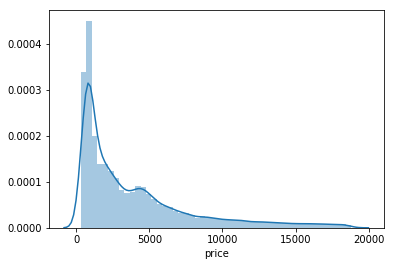

In [6]:
sns.distplot(df.price);

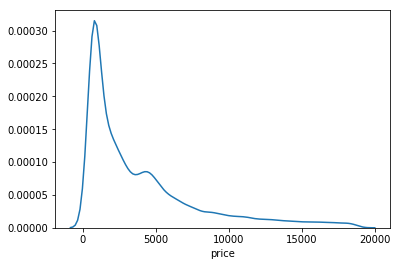

In [9]:
sns.distplot(df.price , hist=False);

In [10]:
df["price"].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

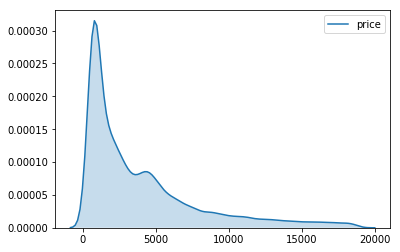

In [11]:
sns.kdeplot(df.price, shade=True);

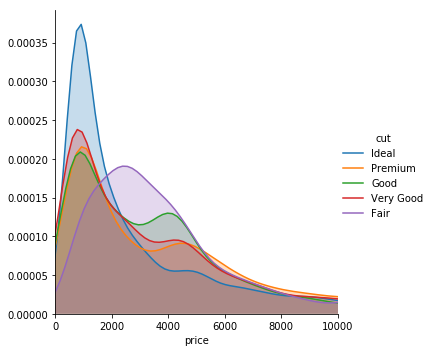

In [27]:
(sns                                          ###ÖNEMLİ!
 .FacetGrid(df,
              hue = "cut",
              height=5,
              xlim = (0,10000))
 .map(sns.kdeplot, "price",shade=True )
 .add_legend()
);

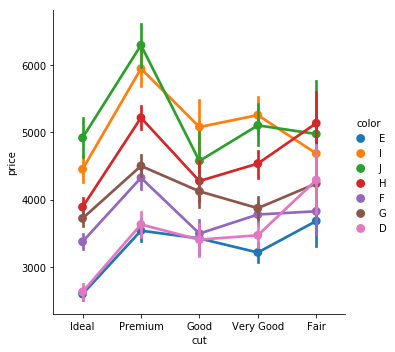

In [30]:
sns.catplot(x="cut", y="price", hue="color", kind="point",data=df)

In [35]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head() #size = gru pta kaç kişi var?

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [38]:
df["sex"].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [39]:
df["smoker"].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [40]:
df["day"].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [41]:
df["time"].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

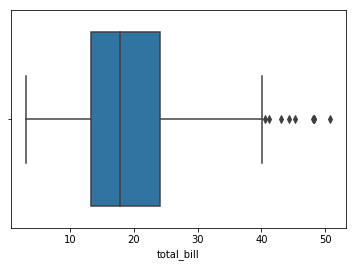

In [47]:
sns.boxplot(x=df["total_bill"]);

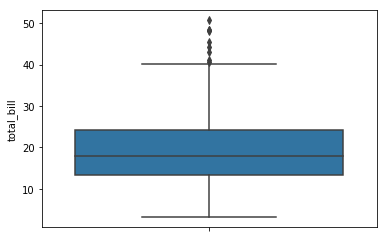

In [44]:
sns.boxplot(x=df["total_bill"], orient="v");

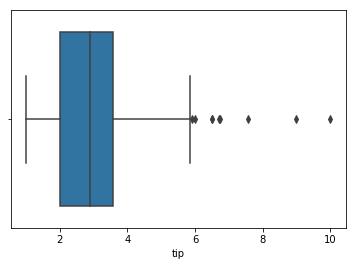

In [48]:
sns.boxplot(x=df["tip"]);

BOX PLOT ÇAPRAZLAMA

In [49]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [50]:
#Hangi günler daha fazla kazanıyoruz?

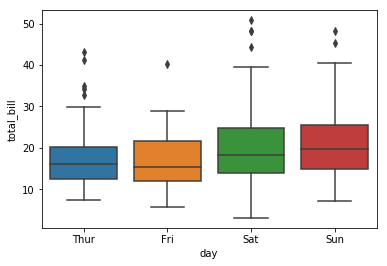

In [56]:
sns.boxplot(x="day",y="total_bill",data =df);

In [60]:
#Günün hangi vaktinde en çok kazanıyoruz? (Launch/Dinner)

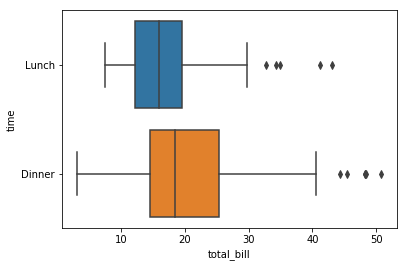

In [61]:
sns.boxplot(x="total_bill",y="time",data=df);

In [62]:
df["time"].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

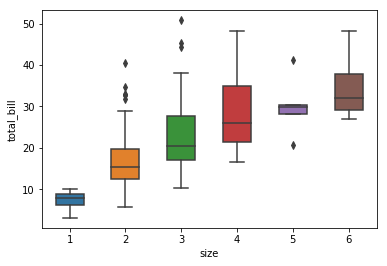

In [79]:
sns.boxplot(x= "size",y= "total_bill",data=df,width=0.5);

In [74]:
?sns.boxplot

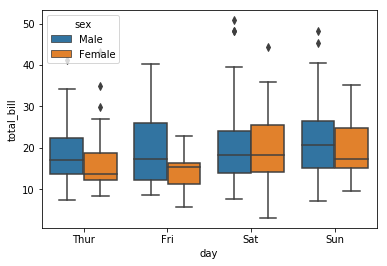

In [81]:
sns.boxplot(x= "day",y= "total_bill", hue="sex",data=df);

VIOLIN

In [82]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


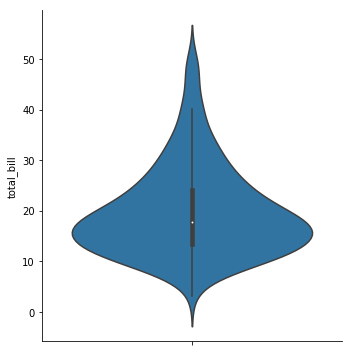

In [85]:
sns.catplot(y="total_bill", kind="violin",data=df);

Çaprazlamalar

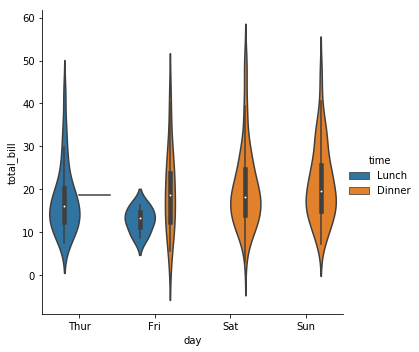

In [91]:
sns.catplot(x="day",y="total_bill", hue="time", kind="violin",data=df);

KORELASYON

Scatterplot (Saçılım) #Sayısal değişkenler arasındaki ilişkiyi gösterir

Kategorik -> Barplot

Sayısal (Sürekli ya da Kesikli) -> Histogram, Yoğunluk, Boxplot, Violin

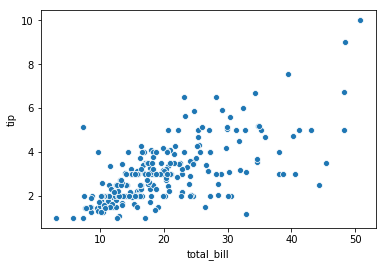

In [93]:
sns.scatterplot(x="total_bill",y="tip",data=df);

Çaprazlama

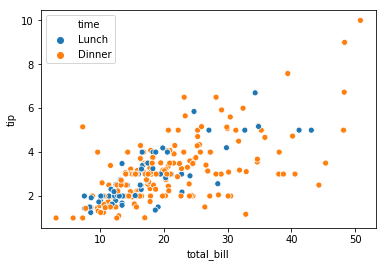

In [100]:
sns.scatterplot(x="total_bill",y="tip",hue="time",data=df);

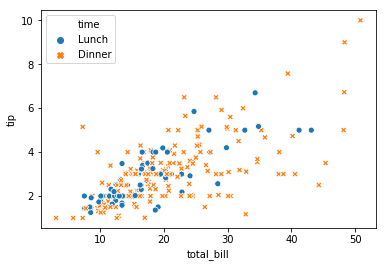

In [101]:
sns.scatterplot(x="total_bill",y="tip",hue="time", style="time",data=df);

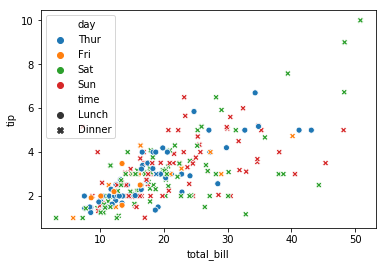

In [103]:
sns.scatterplot(x="total_bill",y="tip",hue="day", style="time",data=df);

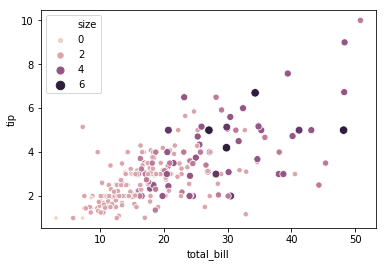

In [105]:
sns.scatterplot(x="total_bill",y="tip",size="size",hue="size" ,data=df);

DOĞRUSAL İLİŞKİNİN GÖSTERİLMESİ

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

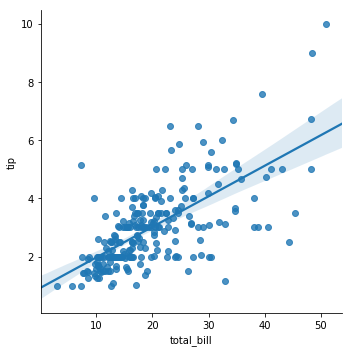

In [109]:
sns.lmplot(x="total_bill", y="tip",data=df);

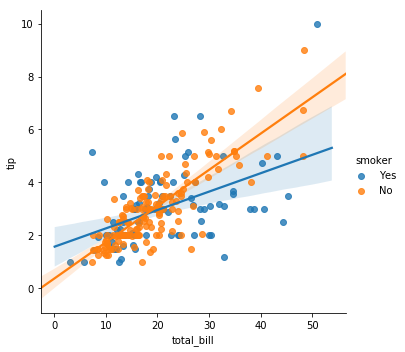

In [118]:
sns.lmplot(x="total_bill", y="tip",hue="smoker",data=df);

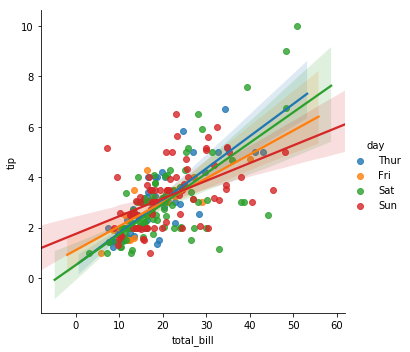

In [119]:
sns.lmplot(x="total_bill", y="tip",hue="day",data=df);

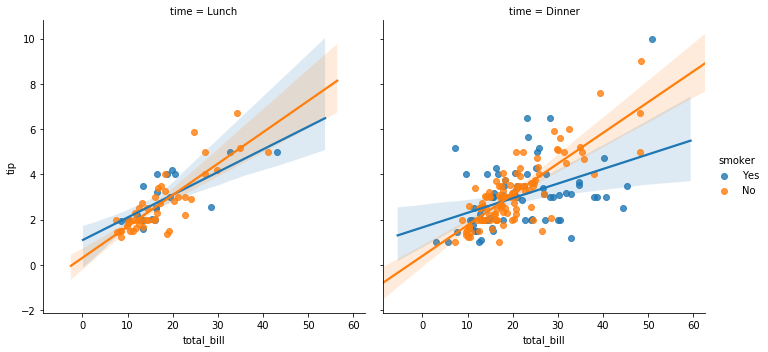

In [123]:
sns.lmplot(x="total_bill", y="tip",hue="smoker",col="time",data=df);

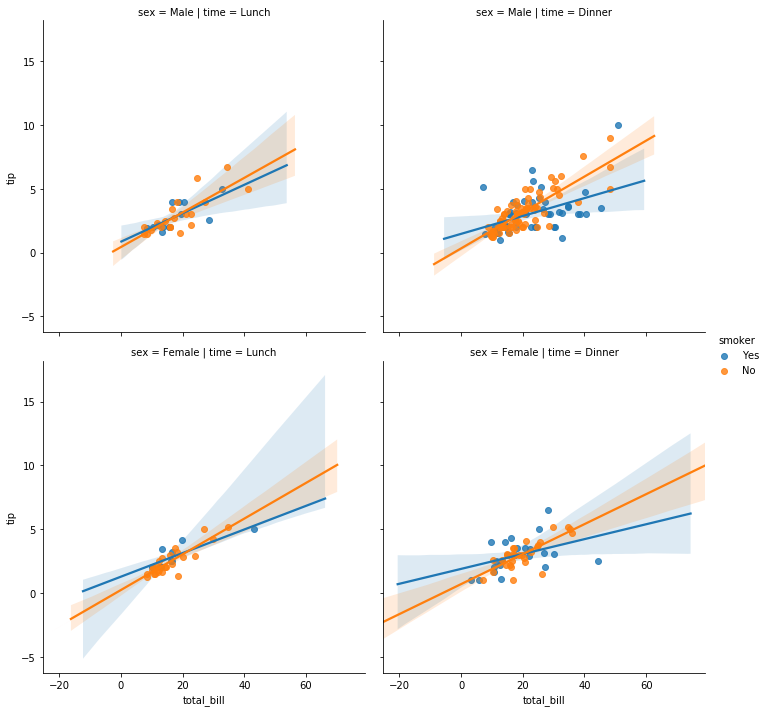

In [125]:
sns.lmplot(x="total_bill", y="tip",hue="smoker",col="time",row="sex",data=df);

SCATTERPLOT MATRİSİ

In [126]:
import seaborn as sns;
iris = sns.load_dataset("iris")
df = iris.copy()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [127]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [128]:
df.shape

(150, 5)

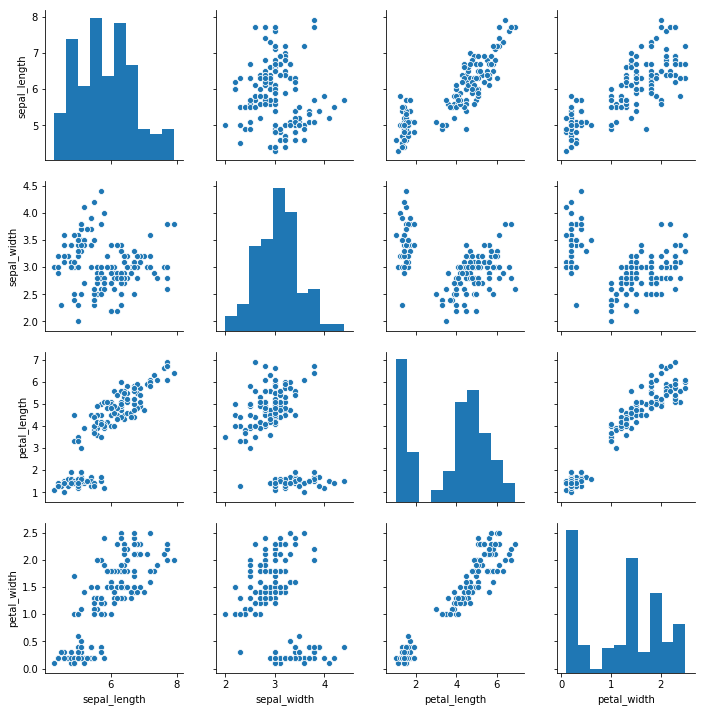

In [129]:
sns.pairplot(df);

***ÖNEMLİ!*** Saçılım grafiği görsellerinde oluşturulmuş olan grafik toz bulutu halindeyse yani belirli bir şekle (forma) sahip değilse bu, iki değişken arasında bir bağlantı olmadığı anlamına gelir!

***ÖNEMLİ!*** Oluşturulan scatterplot içerisindeki gözlem noktaları incelendiğinde, noktalar farklı köşelerde kümeleniyorsa bu durumda çaprazlama durumundan kaynaklanan ve çaprazlama durumuyla gözlemlenebilecek, oluşan farklı kümlenmeleri ifade eden bazı alt gruplar vardır.

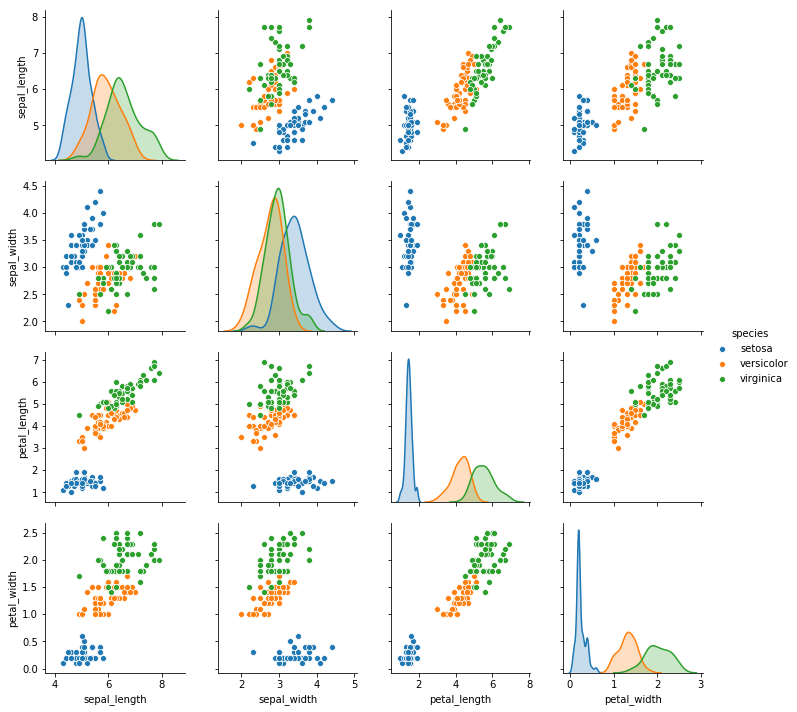

In [131]:
sns.pairplot(df, hue="species");

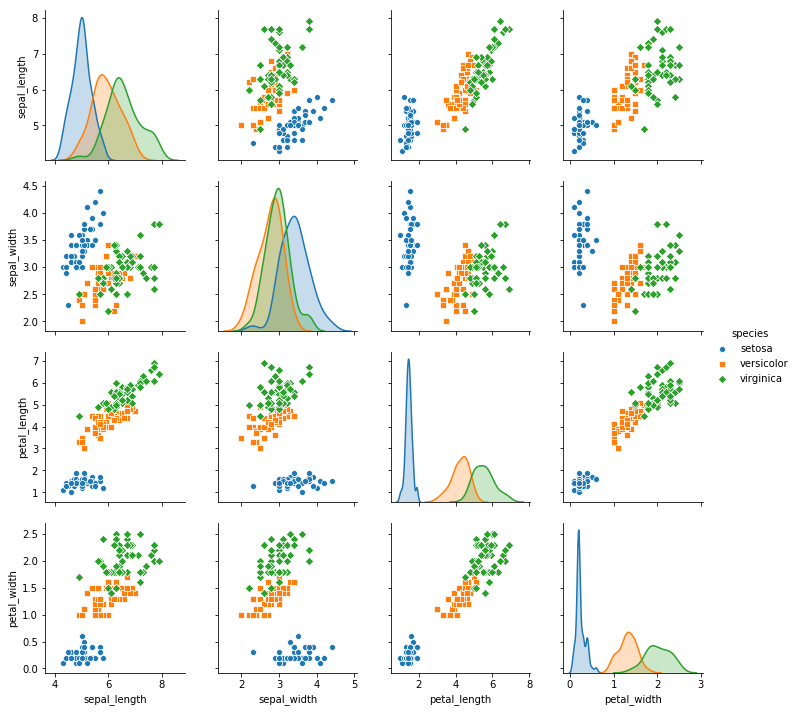

In [132]:
sns.pairplot(df, hue="species", markers=["o","s","D"]);

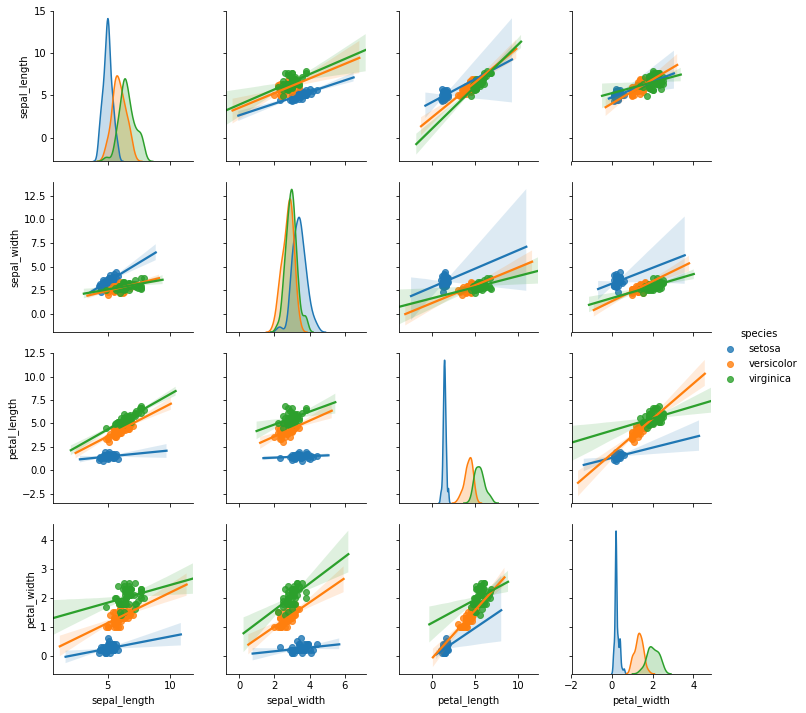

In [134]:
sns.pairplot(df, kind="reg", hue="species");

HEATMAP (Yapısal Anlamda Daha Geniş Perspektif Sağlar)

In [1]:
import seaborn as sns
flights= sns.load_dataset("flights")
df=flights.copy()
df.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [5]:
df.shape

(144, 3)

In [9]:
df["passengers"].describe()

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: passengers, dtype: float64

In [11]:
df=df.pivot("month","year","passengers");

In [12]:
df

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


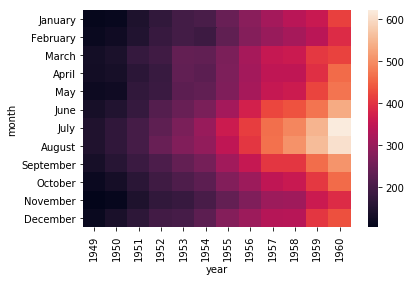

In [14]:
sns.heatmap(df);

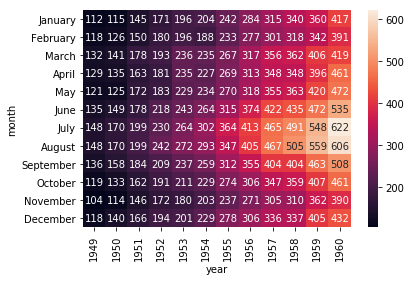

In [15]:
sns.heatmap(df, annot=True,fmt="d");

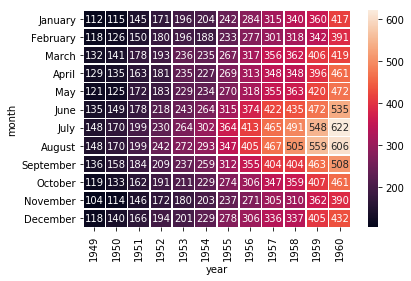

In [19]:
sns.heatmap(df, annot=True, fmt="d", linewidths=0.5);

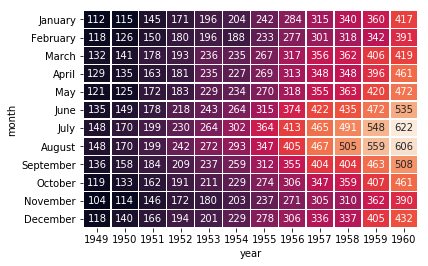

In [21]:
sns.heatmap(df,annot=True,fmt="d",linewidths=0.5, cbar=False);

ÇİZGİ GRAFİK (Zamana Bağlı Veri Setlerinde ve IOT senaryolarında kullanılır)

In [23]:
import seaborn as sns
fmri = sns.load_dataset("fmri")
df=fmri.copy()
df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [24]:
df.shape

(1064, 5)

In [26]:
df["timepoint"].describe()

count    1064.000000
mean        9.000000
std         5.479801
min         0.000000
25%         4.000000
50%         9.000000
75%        14.000000
max        18.000000
Name: timepoint, dtype: float64

In [27]:
df.groupby("timepoint")["signal"].count()

timepoint
0     56
1     56
2     56
3     56
4     56
5     56
6     56
7     56
8     56
9     56
10    56
11    56
12    56
13    56
14    56
15    56
16    56
17    56
18    56
Name: signal, dtype: int64

In [30]:
df.groupby("signal").count()

,subject,timepoint,event,region
signal,,,,
-0.255486,1,1,1,1
-0.238474,1,1,1,1
-0.224351,1,1,1,1
-0.181241,1,1,1,1
-0.178510,1,1,1,1
-0.176453,1,1,1,1
-0.169312,1,1,1,1
-0.160821,1,1,1,1
-0.159772,1,1,1,1


In [31]:
df.groupby("timepoint")["signal"].describe()

,count,mean,std,min,25%,50%,75%,max
timepoint,,,,,,,,
0,56.0,-0.016662,0.028326,-0.064454,-0.039169,-0.018382,0.003539,0.074399
1,56.0,-0.025002,0.030641,-0.082174,-0.046299,-0.024533,-0.005388,0.063558
2,56.0,-0.012873,0.035440,-0.110565,-0.034944,-0.013183,0.009318,0.077277
3,56.0,0.034446,0.058260,-0.089708,-0.001157,0.028430,0.061840,0.185581
4,56.0,0.098194,0.092838,-0.046347,0.030912,0.070166,0.144911,0.346775
5,56.0,0.137725,0.123353,-0.017946,0.042762,0.096535,0.211638,0.476055
6,56.0,0.127515,0.137332,-0.054405,0.022409,0.068850,0.218919,0.564985
7,56.0,0.075660,0.129704,-0.108222,-0.016252,0.032486,0.144781,0.494787
8,56.0,0.013420,0.104216,-0.181241,-0.049453,-0.012834,0.030396,0.337143


Çizgi Grafik ve Çaprazlamalar

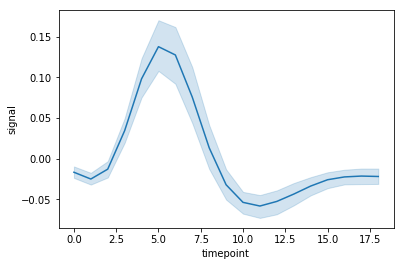

In [38]:
sns.lineplot("timepoint","signal",data=df);

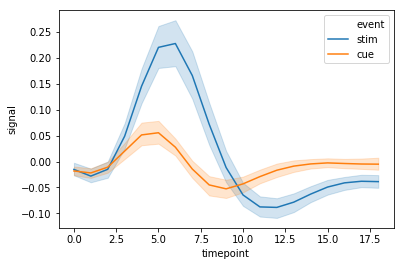

In [39]:
sns.lineplot("timepoint","signal","event",data=df);

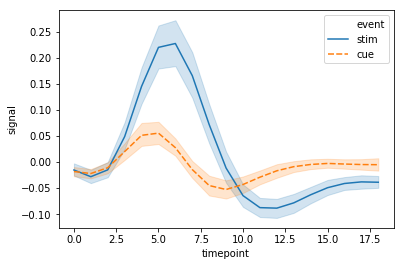

In [40]:
sns.lineplot("timepoint","signal","event",style="event",data=df);

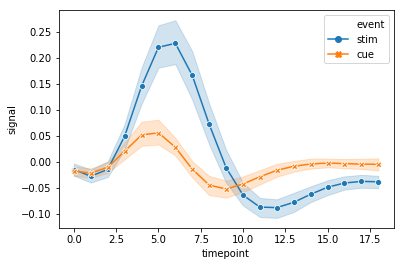

In [46]:
sns.lineplot("timepoint",
             "signal",
             "event",
             style="event",
             markers=True, #ortalama noktaları işaretler
             dashes=False,
             data=df);

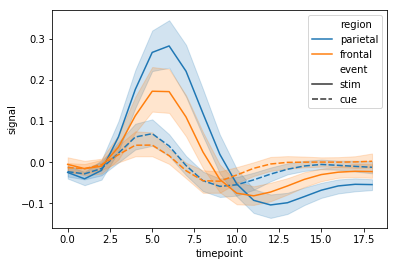

In [47]:
sns.lineplot("timepoint",
             "signal",
             "region",
             style="event",
             data=df);

BASİT ZAMAN SERİSİ GRAFİĞİ

In [1]:
!pip install pandas_datareader
import pandas_datareader as pr

In [10]:
import pandas as pd
df=pr.get_data_yahoo("AAPL", start="2016-01-01",end="2019-08-25") #APPLE hisse senetleri

In [3]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,26.342501,25.500000,25.652500,26.337500,270597600.0,24.443037
2016-01-05,26.462500,25.602501,26.437500,25.677500,223164000.0,23.830513
2016-01-06,25.592501,24.967501,25.139999,25.174999,273829600.0,23.364161
2016-01-07,25.032499,24.107500,24.670000,24.112499,324377600.0,22.378082
2016-01-08,24.777500,24.190001,24.637501,24.240000,283192000.0,22.496408


In [4]:
df.shape

(917, 6)

In [5]:
kapanis= df["Close"]
kapanis.head()

Date
2016-01-04    26.337500
2016-01-05    25.677500
2016-01-06    25.174999
2016-01-07    24.112499
2016-01-08    24.240000
Name: Close, dtype: float64

In [6]:
kapanis.plot();

In [7]:
kapanis.index

DatetimeIndex(['2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07',
               '2016-01-08', '2016-01-11', '2016-01-12', '2016-01-13',
               '2016-01-14', '2016-01-15',
               ...
               '2019-08-12', '2019-08-13', '2019-08-14', '2019-08-15',
               '2019-08-16', '2019-08-19', '2019-08-20', '2019-08-21',
               '2019-08-22', '2019-08-23'],
              dtype='datetime64[ns]', name='Date', length=917, freq=None)

In [14]:
kapanis.index= pd.DatetimeIndex(kapanis.index)#kapanis kısmındaki değerleri "date" tipine dönüştürdük

In [15]:
kapanis.head()

Date
2016-01-04    26.337500
2016-01-05    25.677500
2016-01-06    25.174999
2016-01-07    24.112499
2016-01-08    24.240000
Name: Close, dtype: float64

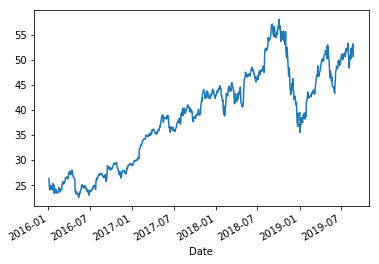

In [16]:
kapanis.plot();